In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/cleaned.csv')

In [7]:
df['card_age_days'] = df['card_age'].apply(lambda val : int(val.split(' days ')[0]))
df['since_last_pin'] = df['since_last_pin'].apply(lambda val : int(val.split(' days ')[0]))

X = df[[
#    'user_id',
    'card_method',
    'mcc_group',
#    'is_retired',
    'log_amount',
#    'card_limit',
#    'card_type',
#    'user_age',
#    'user_gender',
#    'user_rating',
    'user_number_of_cards',
    'city_match',
    'state_match',
    'error_count',
    'is_card_expired',
    'since_last_pin'
]]


X = pd.get_dummies(X)

y = df['flagged_as_fraud']

In [8]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression().fit(xtrain,ytrain)


In [10]:
test_prediction = model.predict(xtest)

print('Accuracy Score: ', accuracy_score(ytest, test_prediction))

Accuracy Score:  0.8683202511773941


In [11]:
print('Confusion Matrix:')
print(confusion_matrix(ytest, test_prediction))

Confusion Matrix:
[[10121   951]
 [ 1146  3707]]


<Axes: ylabel='feature'>

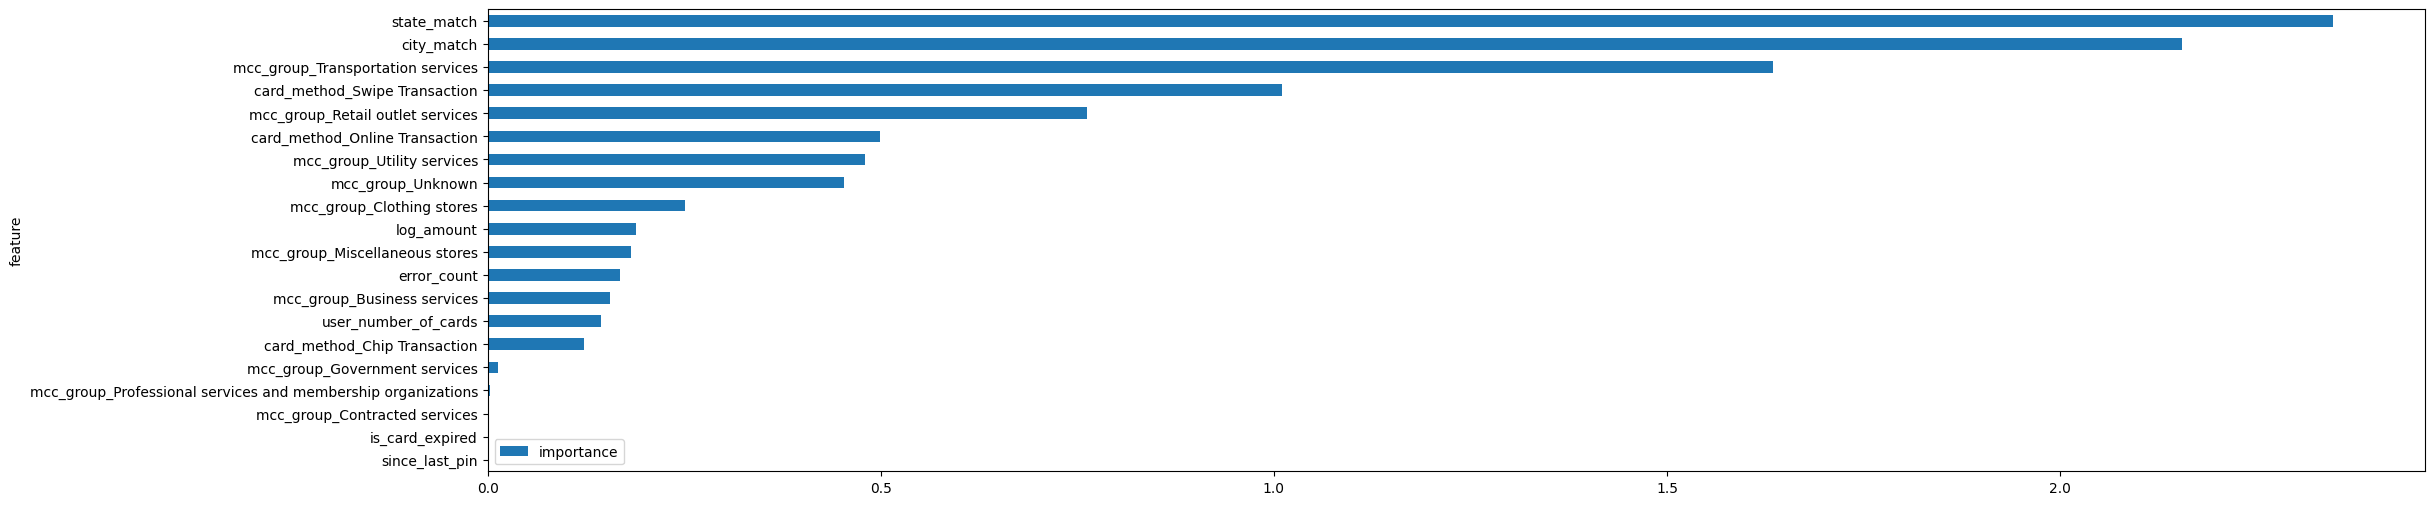

In [12]:
# Assessing importance
N_TOP_FEATURES = 25

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=True).tail(N_TOP_FEATURES)
feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(N_TOP_FEATURES, 6))

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(
    n_estimators=200, 
    max_features='sqrt', 
    min_samples_leaf=10
).fit(xtrain, ytrain)

ypred = rf_classifier.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(ytest, ypred))

Accuracy: 0.9067503924646781

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.94      0.93     11072
        True       0.86      0.84      0.85      4853

    accuracy                           0.91     15925
   macro avg       0.89      0.89      0.89     15925
weighted avg       0.91      0.91      0.91     15925

